In [1]:
from sklearn.datasets import load_breast_cancer
import tensorflow as tf

In [2]:
data=load_breast_cancer()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
data.data.shape

(569, 30)

In [5]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
from sklearn.model_selection import train_test_split


# split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=105)

Epoch 1/105
12/12 [==============================] - 0s 19ms/step - loss: 36.6503 - accuracy: 0.3885 - val_loss: 33.7665 - val_accuracy: 0.3404
Epoch 2/105
12/12 [==============================] - 0s 3ms/step - loss: 27.2312 - accuracy: 0.3885 - val_loss: 24.1283 - val_accuracy: 0.3351
Epoch 3/105
12/12 [==============================] - 0s 2ms/step - loss: 17.9372 - accuracy: 0.3858 - val_loss: 14.6098 - val_accuracy: 0.3351
Epoch 4/105
12/12 [==============================] - 0s 3ms/step - loss: 8.8579 - accuracy: 0.3832 - val_loss: 5.9143 - val_accuracy: 0.4149
Epoch 5/105
12/12 [==============================] - 0s 2ms/step - loss: 3.8902 - accuracy: 0.6037 - val_loss: 3.6709 - val_accuracy: 0.6489
Epoch 6/105
12/12 [==============================] - 0s 3ms/step - loss: 3.4915 - accuracy: 0.6955 - val_loss: 3.6763 - val_accuracy: 0.6702
Epoch 7/105
12/12 [==============================] - 0s 2ms/step - loss: 3.3415 - accuracy: 0.6772 - val_loss: 3.4637 - val_accuracy: 0.6489
Epoch 

Epoch 59/105
12/12 [==============================] - 0s 2ms/step - loss: 1.3567 - accuracy: 0.8294 - val_loss: 1.3339 - val_accuracy: 0.8191
Epoch 60/105
12/12 [==============================] - 0s 2ms/step - loss: 1.3750 - accuracy: 0.8215 - val_loss: 1.3166 - val_accuracy: 0.8191
Epoch 61/105
12/12 [==============================] - 0s 2ms/step - loss: 1.3161 - accuracy: 0.8478 - val_loss: 1.2606 - val_accuracy: 0.8617
Epoch 62/105
12/12 [==============================] - 0s 2ms/step - loss: 1.3179 - accuracy: 0.8451 - val_loss: 1.2657 - val_accuracy: 0.8245
Epoch 63/105
12/12 [==============================] - 0s 2ms/step - loss: 1.3074 - accuracy: 0.8241 - val_loss: 1.2753 - val_accuracy: 0.8245
Epoch 64/105
12/12 [==============================] - 0s 2ms/step - loss: 1.2648 - accuracy: 0.8320 - val_loss: 1.2044 - val_accuracy: 0.8511
Epoch 65/105
12/12 [==============================] - 0s 2ms/step - loss: 1.2597 - accuracy: 0.8478 - val_loss: 1.2062 - val_accuracy: 0.8351
Epoch 

In [11]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 616us/step - loss: 0.8621 - accuracy: 0.8845
Train score: [0.8621043562889099, 0.8845144510269165]
6/6 [==============================] - 0s 703us/step - loss: 0.7030 - accuracy: 0.9043
Test score: [0.7030196785926819, 0.9042553305625916]


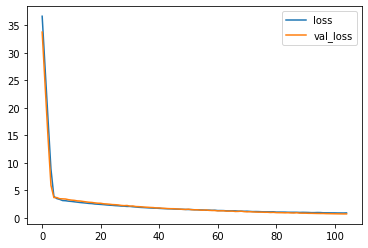

In [12]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()